## Bike Index Seattle - Data Prep

### Data cleaning for Seattle streets data, Pt2

[Traffic Volume Data](https://data.seattle.gov/Transportation/Traffic-Flow-Map-Volumes/38vd-gytv)

[Metadata](https://www.seattle.gov/Documents/Departments/SDOT/GIS/2016_Traffic_Flow_Counts_OD.pdf)

[2016 Volume](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::2016-traffic-flow-counts/about)

[2017 Volume](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::2017-traffic-flow-counts/about)

[2018 Volume](https://data-seattlecitygis.opendata.arcgis.com/datasets/SeattleCityGIS::2018-traffic-flow-counts/about)

No volume data availability for 2019-2020. Will take avg. of the 3 years available as proxy? Use rolling avg?

In [27]:
import pandas as pd
import numpy as np

import geopandas as gpd

import requests
import json

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
crashes_merged = pd.read_csv('data/crash_streets.csv', parse_dates=['DATETIME'])

<AxesSubplot:xlabel='DATETIME'>

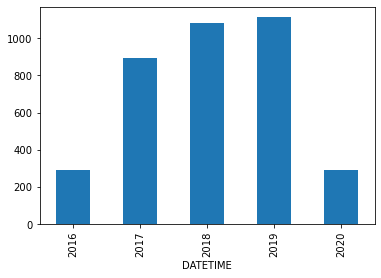

In [5]:
crashes_merged['line_i'].groupby(crashes_merged.DATETIME.dt.year).count().plot(kind='bar')

In [15]:
#url = 'https://data.seattle.gov/resource/38vd-gytv.json'

#r = requests.get(url)

In [30]:
def get_gdf(url):
    
    r = requests.get(url)
    json = r.json()
    
    return gpd.GeoDataFrame.from_features(json['features'])

In [17]:
url_2016 = 'https://opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9.geojson'
url_2017 = 'https://opendata.arcgis.com/datasets/2c37babc94d64bbb938a9b520bc5538c_10.geojson'
url_2018 = 'https://opendata.arcgis.com/datasets/a35aa9249110472ba2c69cc574eff984_11.geojson'

In [32]:
vol_2016 = get_gdf(url_2016)
vol_2017 = get_gdf(url_2017)
vol_2018 = get_gdf(url_2018)

<AxesSubplot:>

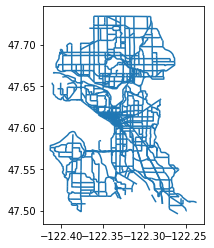

In [36]:
vol_2016.plot()

In [22]:
vol_2017 = get_json(url_2017)

In [23]:
vol_2018 = get_json(url_2018)

In [26]:
vol_2018['crs']

{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}

In [28]:
gdf = gpd.GeoDataFrame.from_features(vol_2016['features'])

In [29]:
gdf

,geometry,OBJECTID,COUNT_COMPKEY,FIRST_STNAME_ORD,FIRST_ARTDESCRIPT,FIRST_TRANDESCRIPT,COUNTFLAG,FLOWSEGID,DOWNTOWN,COUNTSTART,COUNTAADT,COUNTAAWDT,ESTIMATE,AWDT_ROUND,SHAPE_Length
0,"LINESTRING (-122.33968 47.57170, -122.34038 47...",1,None,S SPOKANE ST,None,None,Y,2019.0,N,2015-04-03T00:00:00Z,5508.833000,6829.504000,None,6800.0,1118.471355
1,"LINESTRING (-122.33923 47.57074, -122.33925 47...",2,None,BATTERY ST TUNNEL NB,None,None,Y,2023.0,N,2015-06-09T00:00:00Z,27080.835000,28793.392000,None,28800.0,1605.935119
2,"LINESTRING (-122.33944 47.56635, -122.33939 47...",3,None,ALASKAN WY VI SB,None,None,Y,2024.0,N,2015-06-09T00:00:00Z,0.000000,23393.664000,None,23400.0,2441.189454
3,"LINESTRING (-122.34343 47.57158, -122.34216 47...",4,None,S SPOKANE ST RP,None,None,Y,2025.0,N,2015-06-09T00:00:00Z,3622.684000,4421.927000,None,4400.0,1214.542393
4,"LINESTRING (-122.33314 47.57158, -122.32899 47...",5,None,WEST SEATTLE BR WB,None,None,Y,2026.0,N,2014-04-29T00:00:00Z,46875.085335,50036.029406,None,50000.0,1817.352489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,"LINESTRING (-122.33454 47.53576, -122.33465 47...",1861,None,1ST AV S BR NB,None,None,Y,22.0,W,2015-09-03T00:00:00Z,43529.846000,49880.215000,None,49900.0,4250.820035
1861,"LINESTRING (-122.31741 47.67947, -122.31741 47...",1862,None,ROOSEVELT WAY NE,None,None,Y,25.0,N,None,NaN,14000.000000,Y,14000.0,1328.131644
1862,"LINESTRING (-122.36145 47.57091, -122.36124 47...",1863,None,W SEATTLE BR WB-DELR RP,None,None,Y,26.0,N,2015-04-07T00:00:00Z,1274.658000,1518.429000,None,1500.0,1326.377245
1863,"LINESTRING (-122.38339 47.65563, -122.38325 47...",1864,None,W EMERSON PL,None,None,Y,27.0,N,2015-07-30T00:00:00Z,18361.206000,19776.279000,None,19800.0,1743.234904


In [12]:
vol_2016 = r_2016.json()

vol_2016.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [14]:
vol_2016['features'][0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1,
  'COUNT_COMPKEY': None,
  'FIRST_STNAME_ORD': 'S SPOKANE ST',
  'FIRST_ARTDESCRIPT': None,
  'FIRST_TRANDESCRIPT': None,
  'COUNTFLAG': 'Y',
  'FLOWSEGID': 2019,
  'DOWNTOWN': 'N',
  'COUNTSTART': '2015-04-03T00:00:00Z',
  'COUNTAADT': 5508.833,
  'COUNTAAWDT': 6829.504,
  'ESTIMATE': None,
  'AWDT_ROUND': 6800,
  'SHAPE_Length': 1118.471354555498},
 'geometry': {'type': 'LineString',
  'coordinates': [[-122.33968006811952, 47.57170032667249],
   [-122.340381034581, 47.57167285690613],
   [-122.34201596676822, 47.571608767643994],
   [-122.34250180837996, 47.57159246219214],
   [-122.34343338437787, 47.57157904015345],
   [-122.34420594883082, 47.571562900713126]]}}